In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
# Define Path

path = r'/Users/umachidambaram/June-2021 Instacart Basket Analysis'

In [3]:
# Data set Orders Products Customers

df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data ', 'orders_products_customer4_9.pkl'))

2. The columns First Name, Last Name, income, n_dependants, fam_status and age are PII data.

In [4]:
# Drop columns not needed for analysis

df = df_ords_prods_cust.drop(columns = ['First Name', 'Last Name','Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1)

In [5]:
df.head()

user_id  Gender     STATE  Age date_joined  n_dependants fam_status  \
0    26711  Female  Missouri   48    1/1/2017             3    married   
1    26711  Female  Missouri   48    1/1/2017             3    married   
2    26711  Female  Missouri   48    1/1/2017             3    married   
3    26711  Female  Missouri   48    1/1/2017             3    married   
4    26711  Female  Missouri   48    1/1/2017             3    married   

   income  product_id product_name  ...    price_range_loc     busiest_day  \
0  165665         196         Soda  ...                NaN  Regularly busy   
1  165665         196         Soda  ...                NaN  Regularly busy   
2  165665         196         Soda  ...                NaN  Regularly busy   
3  165665        6184  Clementines  ...  Low-range product  Regularly busy   
4  165665        6184  Clementines  ...  Low-range product  Regularly busy   

         Busiest days  busiest_period_of_day  max_order  loyalty_flag  \
0        Busiest day2          Fewest orders          8  New customer   
1      Regularly busy          Fewest orders          8  New customer   
2        Busiest day2          Fewest orders          8  New customer   
3      Regularly busy          Fewest orders          8  New customer   
4  Least busiest day2          Fewest orders          8  New customer   

   average_price      Spender  Frequency_order    Frequency_Flag  
0       7.988889  Low spender             19.0  Regular customer  
1       7.988889  Low spender             19.0  Regular customer  
2       7.988889  Low spender             19.0  Regular customer  
3       7.988889  Low spender             19.0  Regular customer  
4       7.988889  Low spender             19.0  Regular customer  

[5 rows x 31 columns]

In [6]:
# Result for Region column

Region = []

for var in df["STATE"]:
    if ((var == 'Maine') | (var == 'New Hampshire') | (var == 'Vermont') | (var == 'Massachusetts') | (var =='Rhode Island') | (var =='Connecticut') | (var == 'New York') | (var == 'Pennsylvania') | (var == 'New Jersey')):
        Region.append("Northeast")
    elif ((var == 'Wisconsin') | (var == 'Michigan') | (var == 'Illinois') | (var =='Indiana') | (var =='Ohio') | (var == 'North Dakota') | (var =='South Dakota') | (var =='Nebraska') | (var =='Kansas') | (var == 'Minnesota') | (var == 'Iowa') | (var =='Missouri')):
        Region.append("Midwest")
    elif ((var == 'Delaware') | (var == 'Maryland') | (var == 'District of Columbia') | (var == 'Virginia') | (var =='West Virginia') | (var =='North Carolina') | (var =='South Carolina') | (var =='Georgia') | (var == 'Florida') | (var =='Kentucky') |(var == 'Tennessee') | (var == 'Mississippi') | (var =='Alabama') | (var == 'Oklahoma') | (var =='Texas') | (var =='Arkansas') | (var == 'Louisiana')):
        Region.append("South")
    else:
        Region.append("West")
    

In [7]:
# Create Region column

df['Region'] = Region

In [8]:
# Check frequency of Region column

df['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [9]:
# Check average price of order in Regions

df.groupby(['Region']).agg({'prices':['mean']})

prices
                mean
Region              
Midwest    12.715483
Northeast  11.554997
South      12.195577
West       11.319834

In [10]:
# Sum of Number of orders by region

df.groupby(['Region']).agg({'order_number':['sum']})

order_number
                   sum
Region                
Midwest      128585728
Northeast     98521079
South        185091277
West         143295881

In [11]:
# Days since previous order by region

df.groupby(['Region']).agg({'days_since_prior_order':['median']})

days_since_prior_order
                          median
Region                          
Midwest                      8.0
Northeast                    8.0
South                        8.0
West                         8.0

In [12]:
# Orders hour of day by region

df.groupby(['Region']).agg({'order_hour_of_day':['median']})

order_hour_of_day
                     median
Region                     
Midwest                  13
Northeast                13
South                    13
West                     13

Midwest is spending 27% when South is spending 26% on the average. South is making 33% of orders when midwest is making 23% of orders.

In [13]:
# 4. Low activity customers

df.shape

(32404859, 32)

In [14]:
df.loc[df['order_number'] < 5, 'activity_category'] = 'Low activity'

In [15]:
df.loc[df['order_number'] >= 5, 'activity_category'] = 'High activity'

In [16]:
df['activity_category'].value_counts(dropna = False)

High activity    24414877
Low activity      7989982
Name: activity_category, dtype: int64

In [17]:
# Create dataframe with customers of low activity

df_LowActivity = df[df['activity_category'] == 'Low activity']

In [18]:
df_LowActivity.shape

(7989982, 33)

In [19]:
# Export Low activity customers

df_LowActivity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data ', 'customers_LowActivity.pkl'))

In [20]:
# Drop low activity customers on dataframe

df = df[df['activity_category'] == 'High activity']

In [21]:
df.shape

(24414877, 33)

In [22]:
# 5. Customer profiles

# a) Income

df.loc[df['income'] < 75000, 'income_Range'] = 'Low income'

In [23]:
df.loc[(df['income'] >= 75000) & (df['income'] < 150000), 'income_Range'] = 'Average lowincome'

In [24]:
df.loc[(df['income'] >= 150000) & (df['income'] < 300000), 'income_Range'] = 'Average highincome'

In [25]:
df.loc[df['income'] > 300000, 'income_Range'] = 'High income'

In [26]:
df['income_Range'].value_counts()

Average lowincome     13559237
Low income             7768565
Average highincome     3003888
High income              83187
Name: income_Range, dtype: int64

In [27]:
salary =pd.crosstab(df['user_id'], df['income_Range'], dropna=False )
salary

income_Range  Average highincome  Average lowincome  High income  Low income
user_id                                                                     
1                              0                  0            0          38
2                              0                  0            0         158
3                              0                 58            0           0
4                              0                  0            0           3
7                              0                133            0           0
...                          ...                ...          ...         ...
206203                         0                 20            0           0
206206                         0                274            0           0
206207                         0                159            0           0
206208                       633                  0            0           0
206209                         0                 76            0           0

[162631 rows x 4 columns]

In [28]:
# Export income profile into Prepared data. 

salary.to_csv(os.path.join(path, '02 Data', 'Prepared Data ', 'incomeprofile.csv'))

In [29]:
# Family Status

df.loc[(df ['n_dependants'] == 0), 'family_status'] = 'No Dependants'

In [30]:
df.loc[((df['Age'] >= 18) & (df['Age'] <= 35) & (df['n_dependants'] >= 1)), 'family_status'] = 'Young Parent'

In [31]:
df.loc[(df['Age'] >= 35) & (df['Age'] <= 60) & (df['n_dependants'] >= 1), 'family_status'] = 'Middle Age Parent'

In [32]:
df.loc[(df['Age'] >= 60) & (df['n_dependants'] >= 1), 'family_status'] = 'Older Age Parent'

In [33]:
df['family_status'].value_counts()

Middle Age Parent    7190133
Older Age Parent     6241386
No Dependants        6105002
Young Parent         4878356
Name: family_status, dtype: int64

In [34]:
family_status =pd.crosstab(df['user_id'], df['family_status'], dropna=False )
family_status

family_status  Middle Age Parent  No Dependants  Older Age Parent  \
user_id                                                             
1                              0              0                 0   
2                              0              0               158   
3                              0              0                 0   
4                              0              0                 0   
7                            133              0                 0   
...                          ...            ...               ...   
206203                         0              0                20   
206206                         0              0                 0   
206207                         0              0               159   
206208                         0              0               633   
206209                         0              0                76   

family_status  Young Parent  
user_id                      
1                        38  
2                         0  
3                        58  
4                         3  
7                         0  
...                     ...  
206203                    0  
206206                  274  
206207                    0  
206208                    0  
206209                    0  

[162631 rows x 4 columns]

In [35]:
# Export age profile into Prepared data. 

family_status.to_csv(os.path.join(path, '02 Data', 'Prepared Data ', 'FamilyStatus.csv'))

In [36]:
df.head()

user_id  Gender     STATE  Age date_joined  n_dependants fam_status  \
0    26711  Female  Missouri   48    1/1/2017             3    married   
1    26711  Female  Missouri   48    1/1/2017             3    married   
2    26711  Female  Missouri   48    1/1/2017             3    married   
6    26711  Female  Missouri   48    1/1/2017             3    married   
7    26711  Female  Missouri   48    1/1/2017             3    married   

   income  product_id product_name  ...  max_order  loyalty_flag  \
0  165665         196         Soda  ...          8  New customer   
1  165665         196         Soda  ...          8  New customer   
2  165665         196         Soda  ...          8  New customer   
6  165665        6184  Clementines  ...          8  New customer   
7  165665        6184  Clementines  ...          8  New customer   

   average_price      Spender  Frequency_order    Frequency_Flag   Region  \
0       7.988889  Low spender             19.0  Regular customer  Midwest   
1       7.988889  Low spender             19.0  Regular customer  Midwest   
2       7.988889  Low spender             19.0  Regular customer  Midwest   
6       7.988889  Low spender             19.0  Regular customer  Midwest   
7       7.988889  Low spender             19.0  Regular customer  Midwest   

   activity_category        income_Range      family_status  
0      High activity  Average highincome  Middle Age Parent  
1      High activity  Average highincome  Middle Age Parent  
2      High activity  Average highincome  Middle Age Parent  
6      High activity  Average highincome  Middle Age Parent  
7      High activity  Average highincome  Middle Age Parent  

[5 rows x 35 columns]

In [37]:
# Customers with Pets

df.loc[(df['department_id'] == 8), 'Pet flag'] = 1

In [38]:
df.loc[(df['department_id'] != 8), 'Pet flag'] = 0

In [39]:
df['Pet flag'].value_counts(dropna= False)

0.0    24342766
1.0       72111
Name: Pet flag, dtype: int64

In [40]:
# Group by user_id, sum by total num of orders in dept 8 per user_id (Pet flag)

df_grouped = df.groupby('user_id').agg({'Pet flag':'sum'})

In [41]:
# If Pet Order >= 1 then "Pet Owner" (user had 1 or more orders in dept 8

df_grouped.loc[(df_grouped['Pet flag'] >= 1), 'Pet Owner'] = "Pet"

In [42]:
# If user has no orders in dept 8

df_grouped.loc[(df_grouped['Pet flag'] == 0), 'Pet Owner'] = "No"

In [43]:
# Export pet Owner Profile

df_grouped.to_pickle(os.path.join(path,'02 Data','Prepared Data ', 'Pet Owner Profile.pkl'))

In [44]:
# Drop Pet Order Flag column

df_grouped = df_grouped.drop(columns = ['Pet flag'])

In [45]:
df_grouped.shape

(162631, 1)

In [46]:
# Left join df (left) with df_grouped (right) to get "Pet Order" for each user_id

df = df.merge(df_grouped, on='user_id', how='left')

In [47]:
df['Pet Owner'].value_counts(dropna= False)

No     21782777
Pet     2632100
Name: Pet Owner, dtype: int64

In [48]:
df = df.drop(columns =['Pet flag'])

In [49]:
df.shape

(24414877, 36)

In [50]:
df.head()

user_id  Gender     STATE  Age date_joined  n_dependants fam_status  \
0    26711  Female  Missouri   48    1/1/2017             3    married   
1    26711  Female  Missouri   48    1/1/2017             3    married   
2    26711  Female  Missouri   48    1/1/2017             3    married   
3    26711  Female  Missouri   48    1/1/2017             3    married   
4    26711  Female  Missouri   48    1/1/2017             3    married   

   income  product_id product_name  ...  loyalty_flag  average_price  \
0  165665         196         Soda  ...  New customer       7.988889   
1  165665         196         Soda  ...  New customer       7.988889   
2  165665         196         Soda  ...  New customer       7.988889   
3  165665        6184  Clementines  ...  New customer       7.988889   
4  165665        6184  Clementines  ...  New customer       7.988889   

       Spender  Frequency_order    Frequency_Flag   Region  activity_category  \
0  Low spender             19.0  Regular customer  Midwest      High activity   
1  Low spender             19.0  Regular customer  Midwest      High activity   
2  Low spender             19.0  Regular customer  Midwest      High activity   
3  Low spender             19.0  Regular customer  Midwest      High activity   
4  Low spender             19.0  Regular customer  Midwest      High activity   

         income_Range      family_status  Pet Owner  
0  Average highincome  Middle Age Parent         No  
1  Average highincome  Middle Age Parent         No  
2  Average highincome  Middle Age Parent         No  
3  Average highincome  Middle Age Parent         No  
4  Average highincome  Middle Age Parent         No  

[5 rows x 36 columns]

In [51]:
# Diet Profile

#customers who do not buy from department 12 are vegetarians.

df.loc[(df['department_id'] == 12) , 'diet flag'] = 2

In [52]:
df.loc[(df['department_id'] != 12), 'diet flag'] = 1

In [53]:
df.loc[(df['department_id'] != 12) & (df['department_id'] != 16)  & (df['department_id'] != 20), 'diet flag'] = 0

In [54]:
# Group by user_id, sum by total num of orders in dept per user_id (diet flag)

df_diet_grouped = df.groupby('user_id').agg({'diet flag':'sum'})

In [55]:
df_diet_grouped.loc[(df_diet_grouped['diet flag'] >= 2), 'Diet'] = "carnivore"

In [56]:
df_diet_grouped.loc[(df_diet_grouped['diet flag'] == 1), 'Diet'] = "vegetarian"

In [57]:
df_diet_grouped.loc[(df_diet_grouped['diet flag'] == 0), 'Diet'] = "vegan"

In [58]:
df_diet_grouped.shape

(162631, 2)

In [59]:
# Left join df (left) with df_diet_grouped (right) to get "diet" for each user_id

df = df.merge(df_diet_grouped, on='user_id', how='left')

In [60]:
df['Diet'].value_counts(dropna= False)

carnivore     24046809
vegan           225965
vegetarian      142103
Name: Diet, dtype: int64

In [61]:
df.head()

user_id  Gender     STATE  Age date_joined  n_dependants fam_status  \
0    26711  Female  Missouri   48    1/1/2017             3    married   
1    26711  Female  Missouri   48    1/1/2017             3    married   
2    26711  Female  Missouri   48    1/1/2017             3    married   
3    26711  Female  Missouri   48    1/1/2017             3    married   
4    26711  Female  Missouri   48    1/1/2017             3    married   

   income  product_id product_name  ...  Frequency_order    Frequency_Flag  \
0  165665         196         Soda  ...             19.0  Regular customer   
1  165665         196         Soda  ...             19.0  Regular customer   
2  165665         196         Soda  ...             19.0  Regular customer   
3  165665        6184  Clementines  ...             19.0  Regular customer   
4  165665        6184  Clementines  ...             19.0  Regular customer   

    Region  activity_category        income_Range      family_status  \
0  Midwest      High activity  Average highincome  Middle Age Parent   
1  Midwest      High activity  Average highincome  Middle Age Parent   
2  Midwest      High activity  Average highincome  Middle Age Parent   
3  Midwest      High activity  Average highincome  Middle Age Parent   
4  Midwest      High activity  Average highincome  Middle Age Parent   

   Pet Owner  diet flag_x  diet flag_y       Diet  
0         No          0.0          3.0  carnivore  
1         No          0.0          3.0  carnivore  
2         No          0.0          3.0  carnivore  
3         No          0.0          3.0  carnivore  
4         No          0.0          3.0  carnivore  

[5 rows x 39 columns]

In [62]:
Pet_Owner =pd.crosstab(df['user_id'], df['Pet Owner'], dropna=False )
Pet_Owner

Pet Owner   No  Pet
user_id            
1           38    0
2          158    0
3           58    0
4            3    0
7            0  133
...        ...  ...
206203      20    0
206206     274    0
206207     159    0
206208     633    0
206209      76    0

[162631 rows x 2 columns]

In [63]:
Diet =pd.crosstab(df['user_id'], df['Diet'], dropna=False )
Diet

Diet     carnivore  vegan  vegetarian
user_id                              
1               38      0           0
2              158      0           0
3               58      0           0
4                3      0           0
7              133      0           0
...            ...    ...         ...
206203           0      0          20
206206         274      0           0
206207         159      0           0
206208         633      0           0
206209          76      0           0

[162631 rows x 3 columns]

In [64]:
# Export Pet Owner and diet into Prepared data. 

Pet_Owner.to_csv(os.path.join(path, '02 Data', 'Prepared Data ', 'PetOwner.csv'))


Diet.to_csv(os.path.join(path, '02 Data', 'Prepared Data ', 'Diet.csv'))

In [65]:
customer_profile =pd.crosstab(df['user_id'], [df['income_Range'],df['Region'],df['family_status'],df['Pet Owner'],df['Diet']], dropna=False )

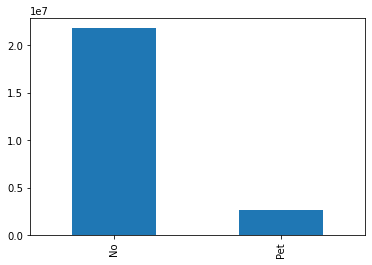

In [66]:
# 6.Distribution of profiles

PetBar= df['Pet Owner'].value_counts().plot.bar()

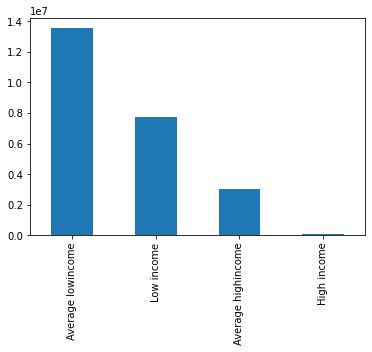

In [67]:
IncomeBar= df['income_Range'].value_counts().plot.bar()

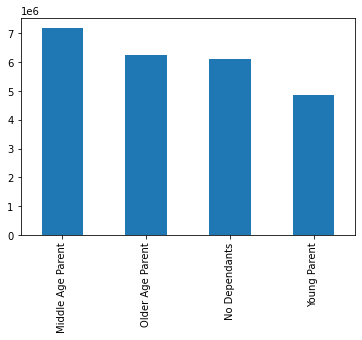

In [68]:
FamilyStatusBar= df['family_status'].value_counts().plot.bar()

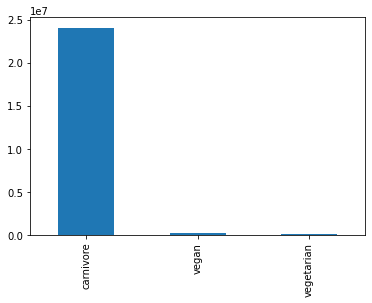

In [69]:
DietBar= df['Diet'].value_counts().plot.bar()

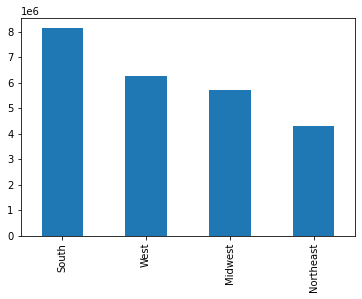

In [70]:
RegionBar= df['Region'].value_counts().plot.bar()

In [71]:
# 7.Aggregation of customer profile

df.groupby('Pet Owner').agg({'Age':['mean', 'min', 'max']})

Age        
                mean min max
Pet Owner                   
No         49.426973  18  81
Pet        49.708635  18  81

Pet Owners and age of customers are not related

In [72]:
df.groupby('Diet').agg({'Age':['mean', 'min', 'max']})

Age        
                 mean min max
Diet                         
carnivore   49.456110  18  81
vegan       49.774593  18  81
vegetarian  49.160721  18  81

There is no difference in age of customers and vegatarians.

In [73]:
df.groupby('Diet').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                             mean  min   max
Diet                                        
carnivore               10.020075  0.0  30.0
vegan                   13.936990  0.0  30.0
vegetarian              14.986679  0.0  30.0

Carnivores tend to order a little more often on the average.

In [74]:
df.groupby('Age').agg({'income':['mean','median','min', 'max']})

income                       
              mean  median    min     max
Age                                      
18    70811.794906   68913  26067  357226
19    69958.756068   69227  25972  396364
20    71294.637958   70911  26024  338939
21    70897.402588   70523  25937  372571
22    69896.375293   69500  26070  369192
..             ...     ...    ...     ...
77   117633.098160  117782  30031  512331
78   118029.967716  118460  29113  381735
79   115740.428254  115792  29330  579169
80   114176.328236  113292  30290  569253
81   115526.537132  116305  29834  571932

[64 rows x 4 columns]

Customers with average high income tend to use the service more.

In [75]:
df.groupby('income_Range').agg({'order_hour_of_day':['mean', 'min', 'max']})

order_hour_of_day        
                                mean min max
income_Range                                
Average highincome         13.390483   0  23
Average lowincome          13.400312   0  23
High income                13.062137   0  23
Low income                 13.288720   0  23

Hour of order and income range are not realted.

In [76]:
df.groupby('Age').agg({'order_hour_of_day':['mean', 'min', 'max']})

order_hour_of_day        
                 mean min max
Age                          
18          13.276405   0  23
19          13.336067   0  23
20          13.382468   0  23
21          13.427935   0  23
22          13.319651   0  23
..                ...  ..  ..
77          13.427025   0  23
78          13.325820   0  23
79          13.331603   0  23
80          13.384430   0  23
81          13.435998   0  23

[64 rows x 3 columns]

Hour of order and age of customers are not related.

In [77]:
df.groupby('family_status').agg({'order_hour_of_day':['mean', 'min', 'max']})

order_hour_of_day        
                               mean min max
family_status                              
Middle Age Parent         13.374915   0  23
No Dependants             13.365228   0  23
Older Age Parent          13.362096   0  23
Young Parent              13.341019   0  23

In [78]:
df.groupby('family_status').agg({'income':['mean', 'min', 'max']})

income               
                            mean    min     max
family_status                                  
Middle Age Parent  105244.585664  25941  592409
No Dependants      100179.559824  25903  584097
Older Age Parent   116264.729513  29001  593901
Young Parent        70710.976831  25911  396364

Older and middle aged customers make more. Customers with no dependents follow and young parents make the least income.

In [79]:
df.groupby('family_status').agg({'Age':['mean', 'min', 'max']})

Age        
                        mean min max
family_status                       
Middle Age Parent  46.961548  35  59
No Dependants      49.547218  18  81
Older Age Parent   70.614147  60  81
Young Parent       25.955268  18  34

In [80]:
# 8.Customer profile with Region and department

#Pet Profile by region
petregion=pd.crosstab(df['Region'],df['Pet Owner'], dropna=False )
petregion

Pet Owner       No     Pet
Region                    
Midwest    5074373  637383
Northeast  3859222  456049
South      7283955  845131
West       5565227  693537

10% of customers from South and NE are pet owners and about 11% from MW and West are pet owners. 

In [81]:
# Pet profile by department
petdepartment=pd.crosstab(df['department_id'],df['Pet Owner'], dropna=False )
petdepartment

Pet Owner           No     Pet
department_id                 
1              1418385  209229
2                23146    4020
3               778259  105071
4              6634401  592690
5                87851   20121
6               174523   23377
7              1792923  243524
8                    0   72111
9               558284   75441
10               25910    1648
11              271091   57389
12              464194   59696
13             1222280  163095
14              469390   55555
15              692825   94965
16             3718875  401613
17              438312  101037
18              307288   28659
19             1953412  233709
20              700039   82972
21               51389    6178

In [82]:
#Diet profile by region
dietregion=pd.crosstab(df['Region'],df['Diet'], dropna=False )
dietregion

Diet       carnivore  vegan  vegetarian
Region                                 
Midwest      5624632  53215       33909
Northeast    4252763  39920       22588
South        8008062  73643       47381
West         6161352  59187       38225

33% of carnivores are from South and 26% are from West. 33% of vegans are from South and 26% from West, 33% of vegetarians are from South and 27% are from West.87% are carnivores, .8% are vegans and .5% are vegetarians.

In [83]:
#Diet profile by department
dietdepartment=pd.crosstab(df['department_id'],df['Diet'], dropna=False )
dietdepartment

Diet           carnivore  vegan  vegetarian
department_id                              
1                1604617  12710       10287
2                  26249    569         348
3                 875462   4209        3659
4                7109387  73331       44373
5                  97971   6619        3382
6                 195991   1042         867
7                1969487  45404       21556
8                  70707    788         616
9                 629157   2145        2423
10                 26943    441         174
11                317907   6425        4148
12                523890      0           0
13               1367015  10089        8271
14                516674   4906        3365
15                780235   3871        3684
16               4114046      0        6442
17                516866  14976        7507
18                333227   1487        1233
19               2132837  36318       17966
20                781684      0        1327
21                 56457    635         475

In [84]:
#Salary by region
incomeregion=pd.crosstab(df['Region'],df['income_Range'], dropna=False )
incomeregion

income_Range  Average highincome  Average lowincome  High income  Low income
Region                                                                      
Midwest                   700621            3188260        26093     1796782
Northeast                 523937            2420464        12782     1358088
South                     997095            4504436        25927     2601628
West                      782235            3446077        18385     2012067

Customers from South make 33% of the income and West 28%. 50% of customers are in the average low income category and 27% are in the low income category.

In [85]:
#Salary by department
incomedepartment=pd.crosstab(df['department_id'],df['income_Range'], dropna=False )
incomedepartment

income_Range   Average highincome  Average lowincome  High income  Low income
department_id                                                                
1                          207999             912460         6296      500859
2                            3506              15026          140        8494
3                          113906             498300         4018      267106
4                          888180            4121436        17002     2200473
5                           16288              56975         2438       32271
6                           24753             113964          720       58463
7                          242165            1067738         7893      718651
8                            9550              40423          618       21520
9                           80317             368239         2309      182860
10                           2956              14803            5        9794
11                          40439             181326         1282      105433
12                          69752             315011         1908      137219
13                         176253             784583         5198      419341
14                          63991             276594         1984      182376
15                         100595             456144         3152      227899
16                         512388            2325644        13825     1268631
17                          68301             290350         3909      176789
18                          43140             198710          571       93526
19                         235674            1052282         7464      891701
20                          96495             437470         2366      246680
21                           7240              31759           89       18479

In [86]:
#Customer age by region
ageregion=pd.crosstab(df['Region'],df['family_status'], dropna=False )
ageregion

family_status  Middle Age Parent  No Dependants  Older Age Parent  \
Region                                                              
Midwest                  1700196        1436961           1438890   
Northeast                1279495        1065138           1109306   
South                    2370419        2038334           2081415   
West                     1840023        1564569           1611775   

family_status  Young Parent  
Region                       
Midwest             1135709  
Northeast            861332  
South               1638918  
West                1242397

33% of customers from south are middle aged parent and 26% are from West. 33.4% of customers from south care for older aged parents and 26% from west.

In [87]:
#Customer age by departmant
agedepartment=pd.crosstab(df['department_id'],df['family_status'], dropna=False )
agedepartment

family_status  Middle Age Parent  No Dependants  Older Age Parent  \
department_id                                                       
1                         479820         405513            417655   
2                           7734           6935              6858   
3                         259877         221599            225756   
4                        2125440        1812885           1849447   
5                          30666          27959             26386   
6                          58413          50038             49693   
7                         598183         512055            524930   
8                          20922          18250             18484   
9                         187875         157414            161388   
10                          8128           6585              7225   
11                         98557          82361             82754   
12                        154284         128206            135898   
13                        408662         345318            354770   
14                        154728         130160            133591   
15                        232208         195449            201899   
16                       1211959        1030238           1048117   
17                        160710         132159            140171   
18                        101319          84313             85358   
19                        644293         545439            556461   
20                        229459         197994            199755   
21                         16896          14132             14790   

family_status  Young Parent  
department_id                
1                    324626  
2                      5639  
3                    176098  
4                   1439319  
5                     22961  
6                     39756  
7                    401279  
8                     14455  
9                    127048  
10                     5620  
11                    64808  
12                   105502  
13                   276625  
14                   106466  
15                   158234  
16                   830174  
17                   106309  
18                    64957  
19                   440928  
20                   155803  
21                    11749

In [88]:
#Family status by region
familyregion=pd.crosstab(df['Region'],df['family_status'], dropna=False )
familyregion

family_status  Middle Age Parent  No Dependants  Older Age Parent  \
Region                                                              
Midwest                  1700196        1436961           1438890   
Northeast                1279495        1065138           1109306   
South                    2370419        2038334           2081415   
West                     1840023        1564569           1611775   

family_status  Young Parent  
Region                       
Midwest             1135709  
Northeast            861332  
South               1638918  
West                1242397

About 30% purchases are by middle age customers, 26% by older customers and customers with no dependants. About 34% customers are from South, 26% from West and 23% from Midwest.

In [89]:
#Family status by department
familydepartment=pd.crosstab(df['department_id'],df['family_status'], dropna=False )
familydepartment

family_status  Middle Age Parent  No Dependants  Older Age Parent  \
department_id                                                       
1                         479820         405513            417655   
2                           7734           6935              6858   
3                         259877         221599            225756   
4                        2125440        1812885           1849447   
5                          30666          27959             26386   
6                          58413          50038             49693   
7                         598183         512055            524930   
8                          20922          18250             18484   
9                         187875         157414            161388   
10                          8128           6585              7225   
11                         98557          82361             82754   
12                        154284         128206            135898   
13                        408662         345318            354770   
14                        154728         130160            133591   
15                        232208         195449            201899   
16                       1211959        1030238           1048117   
17                        160710         132159            140171   
18                        101319          84313             85358   
19                        644293         545439            556461   
20                        229459         197994            199755   
21                         16896          14132             14790   

family_status  Young Parent  
department_id                
1                    324626  
2                      5639  
3                    176098  
4                   1439319  
5                     22961  
6                     39756  
7                    401279  
8                     14455  
9                    127048  
10                     5620  
11                    64808  
12                   105502  
13                   276625  
14                   106466  
15                   158234  
16                   830174  
17                   106309  
18                    64957  
19                   440928  
20                   155803  
21                    11749

In [90]:

familyorder=pd.crosstab(df['days_since_prior_order'],df['family_status'], dropna=False )
familyorder

family_status           Middle Age Parent  No Dependants  Older Age Parent  \
days_since_prior_order                                                       
0.0                                114051         100669             98510   
1.0                                247996         215286            218099   
2.0                                388633         334444            337517   
3.0                                493753         422205            436282   
4.0                                540245         463978            477665   
5.0                                544968         466965            476290   
6.0                                636405         538166            552101   
7.0                                868202         732587            752070   
8.0                                477255         398593            407206   
9.0                                297400         249576            255253   
10.0                               232650         198708            199554   
11.0                               196352         166305            164342   
12.0                               181088         151336            153682   
13.0                               198228         164189            166364   
14.0                               230239         199111            204850   
15.0                               153723         126440            130198   
16.0                               103260          87309             87544   
17.0                                83774          71729             73844   
18.0                                77288          65634             67201   
19.0                                72147          61619             63191   
20.0                                80780          69345             71742   
21.0                                92651          79707             82661   
22.0                                66047          54613             57971   
23.0                                48640          39069             39776   
24.0                                41413          34102             34318   
25.0                                37677          31543             31300   
26.0                                36349          30113             32349   
27.0                                41961          34418             35859   
28.0                                49739          41261             44286   
29.0                                35158          29955             30205   
30.0                               522061         446027            459156   

family_status           Young Parent  
days_since_prior_order                
0.0                            76138  
1.0                           169459  
2.0                           266510  
3.0                           338927  
4.0                           367626  
5.0                           368968  
6.0                           432630  
7.0                           589284  
8.0                           323608  
9.0                           198044  
10.0                          154105  
11.0                          130309  
12.0                          125781  
13.0                          133542  
14.0                          158860  
15.0                          102783  
16.0                           70330  
17.0                           58141  
18.0                           51060  
19.0                           50170  
20.0                           55396  
21.0                           62944  
22.0                           44109  
23.0                           31488  
24.0                           27969  
25.0                           25506  
26.0                           24984  
27.0                           27674  
28.0                           35856  
29.0                           23366  
30.0                          352789

In [91]:
#Prices and orders by hour of day
priceshour=pd.crosstab(df['prices'],df['order_hour_of_day'], dropna=False )
priceshour

order_hour_of_day    0     1    2    3    4    5     6      7      8      9   \
prices                                                                         
1.0                 580   262  166  139  148  242   726   2403   4291   6229   
1.1                1299   639  387  272  296  562  1765   5445  10492  14304   
1.2                1177   606  368  283  334  557  1599   5014   9867  13976   
1.3                2099  1105  646  397  552  934  3293  10012  18725  26014   
1.4                1980   998  587  392  465  838  2720   8889  16777  23776   
...                 ...   ...  ...  ...  ...  ...   ...    ...    ...    ...   
24.8                  2     1    1    2    1    1     2      3     15     17   
24.9                 26    12   10    7    6   14    57    142    240    298   
25.0                 76    24   21   10   13   29   116    296    535    710   
14900.0              16    12   10    7    7   12    31     82    150    222   
99999.0               2     0    3    0    0    1     5     18     36     40   

order_hour_of_day  ...     14     15     16     17     18     19    20    21  \
prices             ...                                                         
1.0                ...   7293   7243   6837   5762   4513   3345  2597  2040   
1.1                ...  14984  14757  13969  11522   9030   7207  5764  4851   
1.2                ...  15641  15350  14597  12000   9114   6939  5425  4512   
1.3                ...  26495  25762  24453  19865  15985  12307  9733  8268   
1.4                ...  25099  24376  22496  18211  13988  10691  8778  7673   
...                ...    ...    ...    ...    ...    ...    ...   ...   ...   
24.8               ...     17     26     31     19     12      5     8     9   
24.9               ...    370    378    331    277    227    165   136    77   
25.0               ...    810    901    809    699    476    345   277   229   
14900.0            ...    249    270    277    235    183    143    93    72   
99999.0            ...     43     46     45     39     22     22    13     7   

order_hour_of_day    22    23  
prices                         
1.0                1618   994  
1.1                3856  2453  
1.2                3447  2170  
1.3                6545  4118  
1.4                6057  3739  
...                 ...   ...  
24.8                  9     5  
24.9                 63    35  
25.0                212   112  
14900.0              48    22  
99999.0               4     3  

[242 rows x 24 columns]

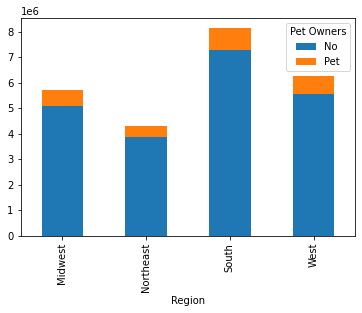

In [92]:
# 9. Charts

#pet and regions stacked bar
petregionprofile= petregion.plot.bar(stacked= True)
plt.legend(title='Pet Owners')

In [93]:
# Export

petregionprofile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_region_profile.png'))

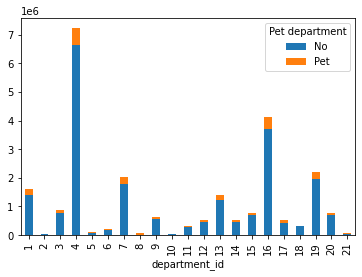

In [94]:
#pet and department stacked bar
petdepartmentprofile= petdepartment.plot.bar(stacked= True)
plt.legend(title='Pet department')

In [95]:
# Export

petdepartmentprofile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_department_profile.png'))

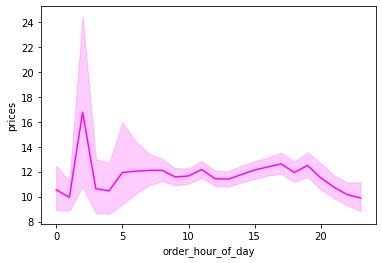

In [96]:
# Prices per hour line graph
pricehourline= sns.lineplot(data= df, x= 'order_hour_of_day', y= 'prices', color = 'magenta')

In [97]:
# Export

pricehourline.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_hour_of_order.png'))

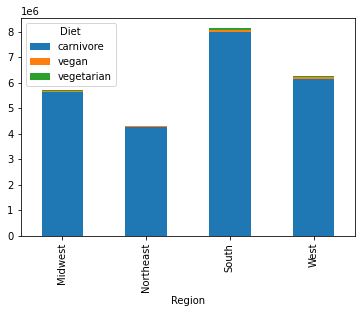

In [98]:
#diet and regions stacked bar
dietregion= dietregion.plot.bar(stacked= True)
plt.legend(title='Diet')

In [99]:
# Export

dietregion.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_region_profile.png'))

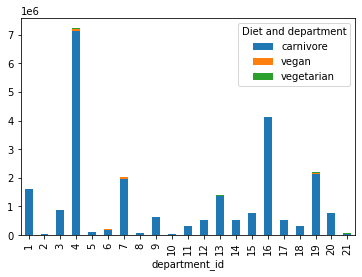

In [100]:
#diet and department stacked bar
dietdepartment= dietdepartment.plot.bar(stacked= True)
plt.legend(title='Diet and department')

In [101]:
# Export

dietdepartment.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_department_profile.png'))

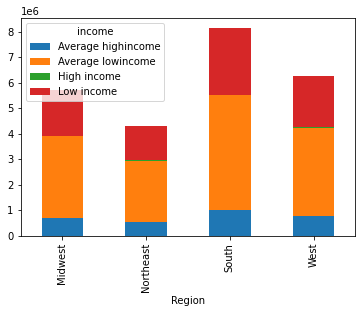

In [102]:
#income and regions stacked bar
incomeregion= incomeregion.plot.bar(stacked= True)
plt.legend(title='income')

In [103]:
# Export

incomeregion.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_profile.png'))

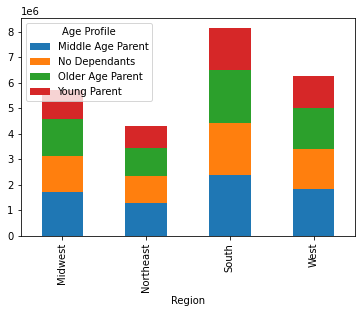

In [104]:
#age and regions stacked bar
familyregion= familyregion.plot.bar(stacked= True)
plt.legend(title='Age Profile')

In [105]:
# Export

familyregion.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_profile.png'))

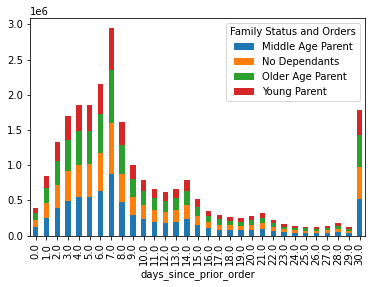

In [106]:
familyordersbar= familyorder.plot.bar(stacked= True)
plt.legend(title='Family Status and Orders')

In [107]:
# Export

familyordersbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'familyOrders.png'))

In [108]:
#family and loyalty
familyloyalty=pd.crosstab(df['family_status'],df['loyalty_flag'], dropna=False )
familyloyalty

loyalty_flag       Loyal customer  New customer  Regular customer
family_status                                                    
Middle Age Parent         2806142        618222           3765769
No Dependants             2405943        528819           3170240
Older Age Parent          2445439        549751           3246196
Young Parent              1897967        418036           2562353

30% of loyal customers are middle aged parents and 25% are customers with no dependants and another 25% are customers who take care of older aged parents. Regular customers are also in the same percentage.

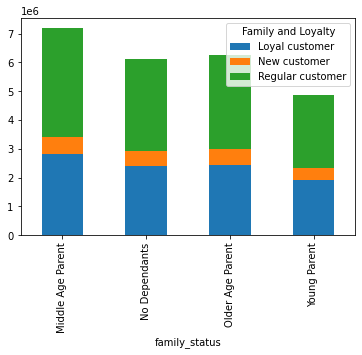

In [109]:
# Family and Loyalty bar

familyloyaltybar = familyloyalty.plot.bar(stacked= True)
plt.legend(title='Family and Loyalty')

In [110]:
# Export

familyloyaltybar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'FamilyLoyalty.png'))

In [111]:
#income and loyalty 

incomeloyalty=pd.crosstab(df['income_Range'],df['loyalty_flag'], dropna=False )
incomeloyalty

loyalty_flag        Loyal customer  New customer  Regular customer
income_Range                                                      
Average highincome         1181697        251043           1571148
Average lowincome          5325532       1146547           7087158
High income                  37640          3569             41978
Low income                 3010622        713669           4044274

52% of Regular customers earn average high income and Low income. 

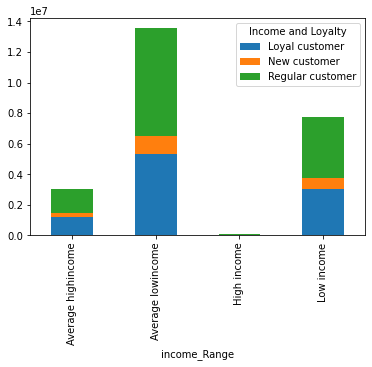

In [112]:
# Income and Loyalty bar

incomeloyaltybar = incomeloyalty.plot.bar(stacked= True)
plt.legend(title='Income and Loyalty')

In [113]:
# Export

incomeloyaltybar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'IncomeLoyalty.png'))

In [114]:
df.head()

user_id  Gender     STATE  Age date_joined  n_dependants fam_status  \
0    26711  Female  Missouri   48    1/1/2017             3    married   
1    26711  Female  Missouri   48    1/1/2017             3    married   
2    26711  Female  Missouri   48    1/1/2017             3    married   
3    26711  Female  Missouri   48    1/1/2017             3    married   
4    26711  Female  Missouri   48    1/1/2017             3    married   

   income  product_id product_name  ...  Frequency_order    Frequency_Flag  \
0  165665         196         Soda  ...             19.0  Regular customer   
1  165665         196         Soda  ...             19.0  Regular customer   
2  165665         196         Soda  ...             19.0  Regular customer   
3  165665        6184  Clementines  ...             19.0  Regular customer   
4  165665        6184  Clementines  ...             19.0  Regular customer   

    Region  activity_category        income_Range      family_status  \
0  Midwest      High activity  Average highincome  Middle Age Parent   
1  Midwest      High activity  Average highincome  Middle Age Parent   
2  Midwest      High activity  Average highincome  Middle Age Parent   
3  Midwest      High activity  Average highincome  Middle Age Parent   
4  Midwest      High activity  Average highincome  Middle Age Parent   

   Pet Owner  diet flag_x  diet flag_y       Diet  
0         No          0.0          3.0  carnivore  
1         No          0.0          3.0  carnivore  
2         No          0.0          3.0  carnivore  
3         No          0.0          3.0  carnivore  
4         No          0.0          3.0  carnivore  

[5 rows x 39 columns]

In [115]:
# Export data to pkl

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data ', 'CustomerProfiles_to_data.pkl'))